In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/suicide-watch/Suicide_Detection.csv


# Sucide Watch

This project is made in order to detect person Vulnerability or likelyhood to commit Suicide

In [2]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Suicide watch Dataset contains people notes who have commited suicides 

In [3]:
train = pd.read_csv("/kaggle/input/suicide-watch/Suicide_Detection.csv")

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  232074 non-null  int64 
 1   text        232074 non-null  object
 2   class       232074 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.3+ MB


In [5]:
train['text'] = train['text'].astype(str)
   

In [6]:
data = []
max_len= 0
max_len_seq = 0 
for i in train['text']:
    data.append(i)
    max_len+=len(i)
    max_len_seq= max(max_len_seq,len(i))

In [7]:
train.loc[train['class']== 'suicide'] = 1
train.loc[train['class']== 'non-suicide'] = 0

In [8]:
pred = np.asarray(train['class'])

In [9]:
print(pred)

[1 0 0 ... 0 1 0]


**Splitting Data in Train, Test And Validation Sets**

In [10]:
txt, x_test, acc_pred, y_test = train_test_split(data
    , pred, test_size=0.10, random_state=0)

In [11]:
txt, x_val, acc_pred, y_val= train_test_split(txt, acc_pred, test_size=0.20, random_state=0)

In [12]:
print(max_len)

160047452


**Tokenizing sentences**

In [13]:
tokenizer = Tokenizer(num_words = 16004, oov_token='<OOV>')
tokenizer.fit_on_texts(txt)

In [14]:
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(sequences, padding='post', truncating='post', maxlen= 500)

In [15]:
val_sequences = tokenizer.texts_to_sequences(x_val)
val_padded = pad_sequences(val_sequences, padding='post', truncating='post', maxlen= 500)

In [16]:
test_sequences = tokenizer.texts_to_sequences(x_test)
test_padded = pad_sequences(test_sequences, padding='post', truncating='post', maxlen= 500)

**Ready Data for Training , Validating and Testing**

In [17]:

training_padded = np.array(padded).astype(int)
training_labels = np.array(acc_pred).astype(int)
val_padded = np.array(val_padded).astype(int)
val_labels = np.array(y_val).astype(int)
test_padded = np.array(test_padded).astype(int)
test_labels = np.array(y_test).astype(int)

In [18]:
training_labels = training_labels.reshape(-1,1)

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(16004,8,input_shape =training_padded[0].shape),
    tf.keras.layers.LSTM(28,return_sequences=True),
    tf.keras.layers.LSTM(28),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [20]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 8)            128032    
                                                                 
 lstm (LSTM)                 (None, 500, 28)           4144      
                                                                 
 lstm_1 (LSTM)               (None, 28)                6384      
                                                                 
 dense (Dense)               (None, 1)                 29        
                                                                 
Total params: 138589 (541.36 KB)
Trainable params: 138589 (541.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
num_epochs = 10
history = model.fit(training_padded, training_labels, epochs=num_epochs,  validation_data=(val_padded, val_labels), verbose=1)

Epoch 1/10
5222/5222 [==============================] - 330s 62ms/step - loss: 0.4222 - accuracy: 0.7661 - val_loss: 0.2131 - val_accuracy: 0.9216
Epoch 2/10
5222/5222 [==============================] - 211s 40ms/step - loss: 0.1669 - accuracy: 0.9400 - val_loss: 0.1466 - val_accuracy: 0.9464
Epoch 3/10
5222/5222 [==============================] - 206s 39ms/step - loss: 0.1309 - accuracy: 0.9531 - val_loss: 0.1384 - val_accuracy: 0.9498
Epoch 4/10
5222/5222 [==============================] - 205s 39ms/step - loss: 0.1129 - accuracy: 0.9594 - val_loss: 0.1404 - val_accuracy: 0.9476
Epoch 5/10
5222/5222 [==============================] - 202s 39ms/step - loss: 0.0977 - accuracy: 0.9654 - val_loss: 0.1339 - val_accuracy: 0.9514
Epoch 6/10
5222/5222 [==============================] - 202s 39ms/step - loss: 0.0877 - accuracy: 0.9692 - val_loss: 0.1384 - val_accuracy: 0.9503
Epoch 7/10
5222/5222 [==============================] - 202s 39ms/step - loss: 0.0786 - accuracy: 0.9726 - val_loss: 0

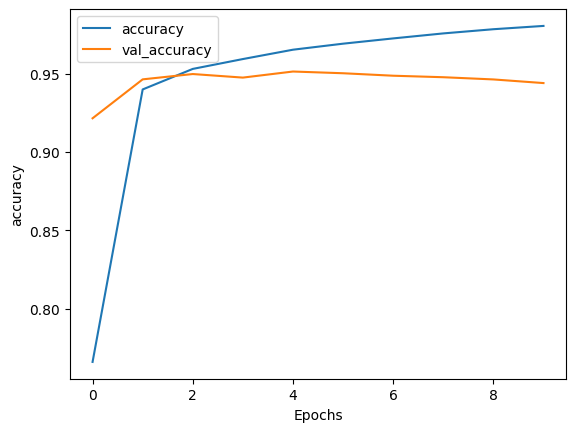

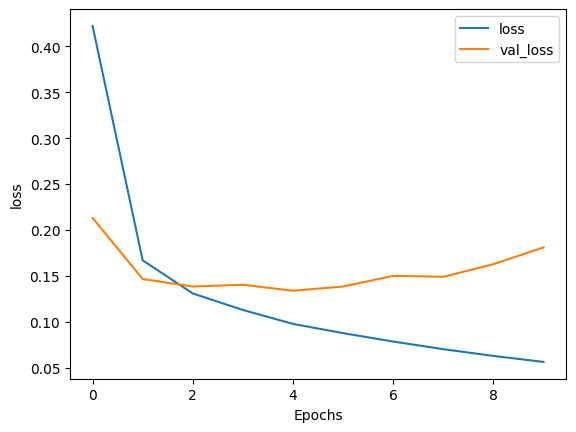

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [23]:
y_pred = model.predict(test_padded)

726/726 [==============================] - 11s 14ms/step


In [24]:
y_pred[y_pred>=0.5]= 1
y_pred[y_pred<0.5]= 0

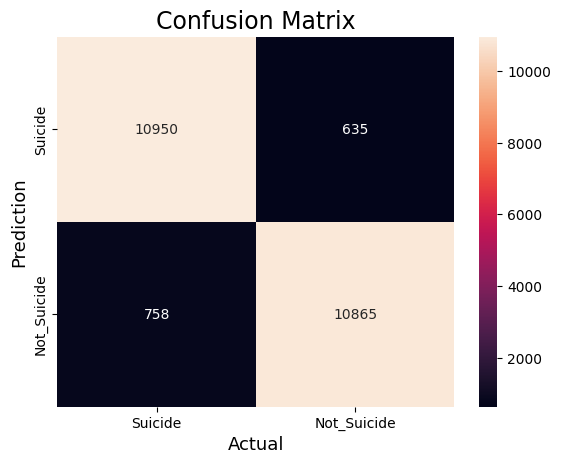

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, y_pred)
tn, fp, fn, tp = cm.ravel()
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Suicide','Not_Suicide'],
            yticklabels=['Suicide','Not_Suicide'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [26]:
from sklearn.metrics import accuracy_score
print((accuracy_score(test_labels,y_pred))*100)

93.99775939331265
